# Using the data from NBA.com/Stats and R to create shot chart

![](./Stephen_Curry_Stats.jpg)


##  Data Source : NBA.com/Stats

![](./NBA_Stats.png)

## R : Shot Chart

In [1]:
# Library
library(rjson)
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.3

In [2]:
# Player ID & ShotData
playerID <- 201939 # Stephen Curry
shotURL <- "http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2014-15&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID="
shotData <- fromJSON(file = shotURL, method = 'C')
shotDataf <- data.frame(matrix(unlist(shotData$resultSets[[1]][[3]]), ncol = 21, byrow = TRUE))
colnames(shotDataf) <- shotData$resultSets[[1]][[2]]

In [3]:
# Shot coordination
shotDataf$LOC_X <- as.numeric(as.character(shotDataf$LOC_X))
shotDataf$LOC_Y <- as.numeric(as.character(shotDataf$LOC_Y))
shotDataf$SHOT_DISTANCE <- as.numeric(as.character(shotDataf$SHOT_DISTANCE))

In [4]:
# Basic shot chart
#ggplot(shotDataf,aes(x = LOC_X, y = LOC_Y)) + geom_point(aes(colour = EVENT_TYPE))

## Plot with court background and colour 

In [5]:
# Insert half court image
library(grid) # grid graphic package
library(jpeg) # read and write jpeg image
library(RCurl) # HTTP

courtImgURL <- "http://www.billcritomatic.org/wp-content/uploads/2015/03/Nba-Basketball-Court-Dimensions.jpg"
court <- rasterGrob(readJPEG(getURLContent(courtImgURL)),width=unit(1,"npc"), height=unit(1,"npc"))

Loading required package: bitops


Warning message:
: Removed 7 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


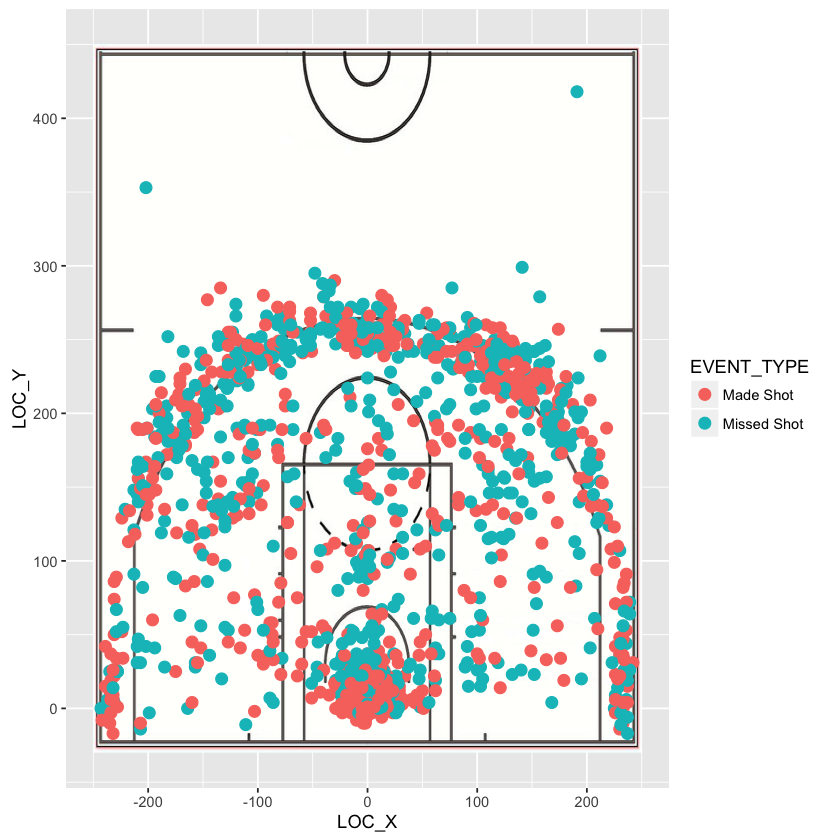

In [6]:
# colour : Event_type
ggplot(shotDataf,aes(x = LOC_X, y = LOC_Y)) + annotation_custom(court, -250, 250, -30, 450) + 
geom_point(aes(colour = EVENT_TYPE),size =3) + xlim(-250,250) + ylim(-30,450)

Warning message:
: Removed 7 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


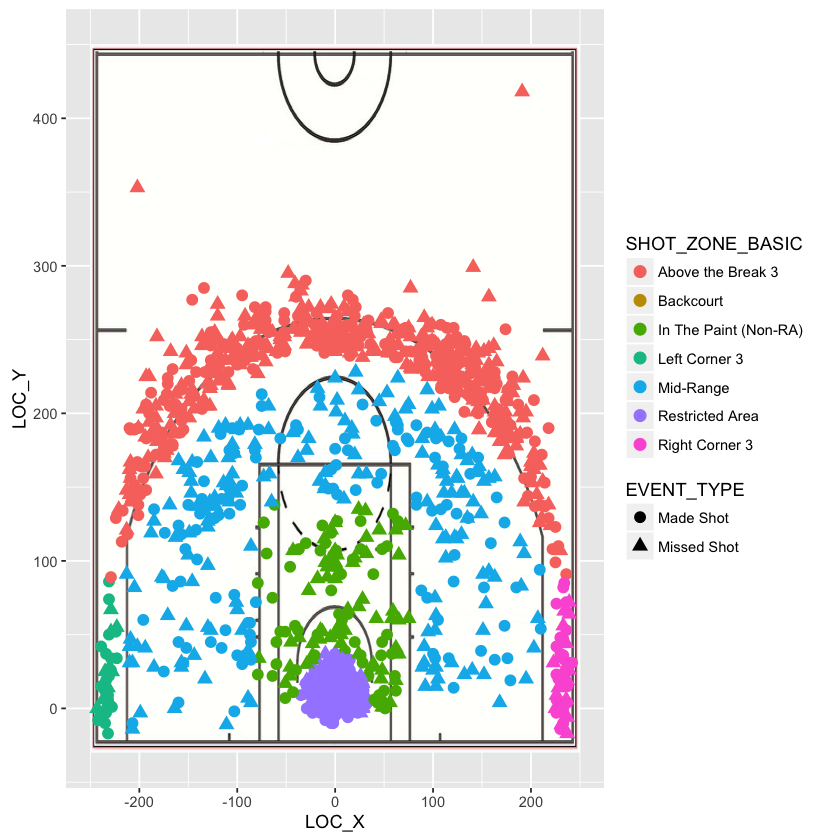

In [7]:
# colour : Shot_zone
ggplot(shotDataf,aes(x = LOC_X, y = LOC_Y)) + annotation_custom(court, -250, 250, -30, 450) + 
geom_point(aes(colour = SHOT_ZONE_BASIC, shape=EVENT_TYPE),size =3) + xlim(-250,250) + ylim(-30,450)

## Calculating the field goal percentage 

In [8]:
# exclude backcourt shots
shotDataP <- shotDataf[which(!shotDataf$SHOT_ZONE_BASIC =='Backcourt'),]

# summarise shot data
library(plyr)
shot2 <- ddply(shotDataP,.(SHOT_ZONE_BASIC), summarise,
              SHOTS_ATTEMPTED = length(SHOT_MADE_FLAG),
              SHOTS_MADE = sum(as.numeric(as.character(SHOT_MADE_FLAG))),
              MLOC_X = mean(LOC_X),
              MLOC_Y = mean(LOC_Y))

In [9]:
# calculate field goad percentage per zone
shot2$FIELD_GOAL_PERCENTAGE <- (shot2$SHOTS_MADE / shot2$SHOTS_ATTEMPTED)
shot2$FIELD_GOAL_PERCENTAGE_LABEL <- paste(as.character(round(100 * shot2$FIELD_GOAL_PERCENTAGE ,1)), '%', sep ='')

ERROR: Error in file(con, "rb"): cannot open the connection


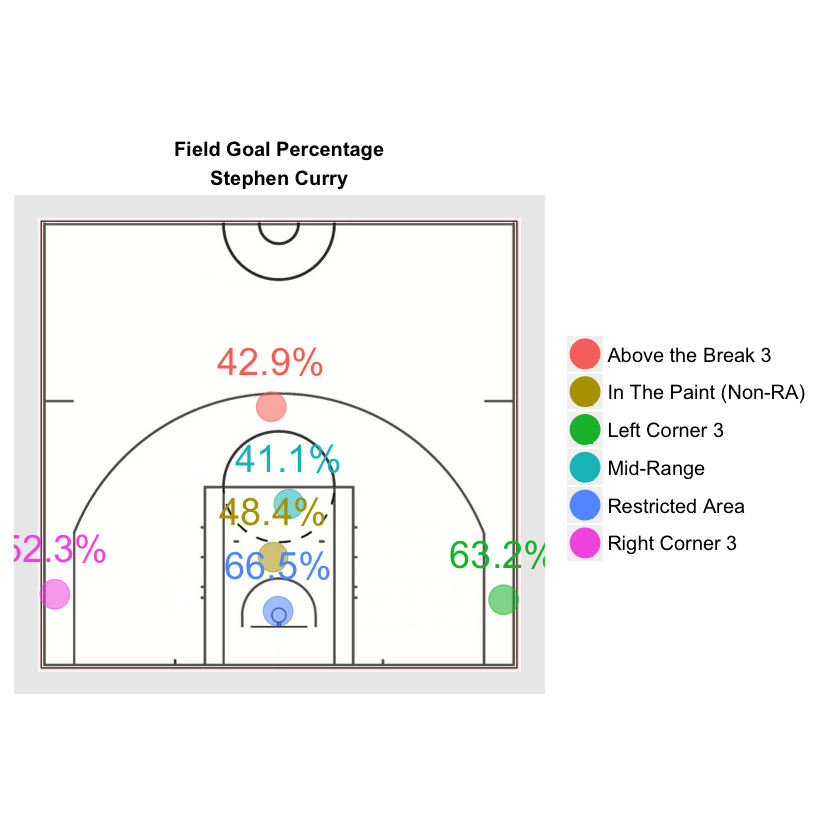

In [10]:
# plot
ggplot(shot2, aes(x=MLOC_X, y=MLOC_Y)) + 
  annotation_custom(court, -250, 250, -52, 418) +
  geom_point(aes(colour = SHOT_ZONE_BASIC, size = FIELD_GOAL_PERCENTAGE, alpha = 0.8), size = 8) +
  geom_text(aes(colour = SHOT_ZONE_BASIC, label = FIELD_GOAL_PERCENTAGE_LABEL), vjust = -1.2, size = 8) +
  guides(alpha = FALSE, size = FALSE) +
  xlim(250, -250) +
  ylim(-52, 418) +
  coord_fixed() +
  ggtitle(paste("Field Goal Percentage\n", unique(shotDataf$PLAYER_NAME), sep = "")) +
  theme(line = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        legend.title = element_blank(),
        legend.text=element_text(size = 12),
        plot.title = element_text(size = 12, lineheight = 1.2, face = "bold"))